# Pruebas y Manipulación del código

## 0. Importación de librerías

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from CMPendulum import pendulum as pend, animation as ani, basins as bs, plot_solutions as plot_

In [2]:
%matplotlib auto
%matplotlib auto

Using matplotlib backend: <object object at 0x000001EE3B402440>
Using matplotlib backend: TkAgg


## 1. Analisis inicial

Las condiciones iniciales corresponden a un conjunto de 3 imanes puestos sobre una circunferencia de radio 0.09 [$m$] de manera simetrica. 

<center> 
<img src="https://raw.githubusercontent.com/AndresGuarin/Images/main/Magnets_page-0001.jpg" width="350px" height="350px">
</center>

### A. Parámetros del código

In [3]:
# Physical parameters
l = 0.5
R = 0
d = 0.03
m = 0.05
mu_P_magn = 2

# Code parameters
h = 0.001
T0 = 2*np.pi*np.sqrt(l/9.8)  # Pendulum period
T = 1                       # Total time of simulation
N = int(T/h)

# Magnets
radio = 0.09 
ang = np.array([0,120,240])
Mx = radio*np.cos(np.deg2rad(ang)); My = radio*np.sin(np.deg2rad(ang))
mu = [-1.4]*3; u = [np.array([0,0,-1])]*3

# Initial Conditions
CI = [0.1, 0.1, 0, 0]

In [4]:
p = pend.pendulum()
p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
p.set_code_parameters(h, N)
p.set_magnets(Mx, My, [0,0,0], mu, u)
p.set_initial_conditions(CI, 'cartesians')
inicio = time.time()
p.find_path(show=True, Return='none')
fin = time.time(); print('Tiempo de ejecución: %.2f'%(fin-inicio))

# Get self
selfp = p.get_self()

====================== Summary report ============================
Physical parameters: 
   l =  0.5
   d =  0.03
   R =  0
   m =  0.05
   mu_P_magn =  2
   mu_P_dir  =  [ 0  0 -1]
   model =  RK4
   law   =  F1
Code parameters:
   h =  0.001
   N =  1000
Initial values
   x  =  0.1
   y  =  0.1
   vx =  0
   vy =  0
   NMAGNETS =  3
   mu_magn  =  [-1.4, -1.4, -1.4]
   mu_dir   =  [array([ 0,  0, -1]), array([ 0,  0, -1]), array([ 0,  0, -1])]
███╗   ███╗ █████╗  ██████╗ ███╗   ██╗███████╗████████╗██╗ ██████╗
████╗ ████║██╔══██╗██╔════╝ ████╗  ██║██╔════╝╚══██╔══╝██║██╔════╝
██╔████╔██║███████║██║  ███╗██╔██╗ ██║█████╗     ██║   ██║██║     
██║╚██╔╝██║██╔══██║██║   ██║██║╚██╗██║██╔══╝     ██║   ██║██║     
██║ ╚═╝ ██║██║  ██║╚██████╔╝██║ ╚████║███████╗   ██║   ██║╚██████╗
╚═╝     ╚═╝╚═╝  ╚═╝ ╚═════╝ ╚═╝  ╚═══╝╚══════╝   ╚═╝   ╚═╝ ╚═════╝

██████╗ ███████╗███╗   ██╗██████╗ ██╗   ██╗██╗     ██╗   ██╗███╗   ███╗
██╔══██╗██╔════╝████╗  ██║██╔══██╗██║   ██║██║     ██║   ██║████╗ ████║
███

### B. Resultados

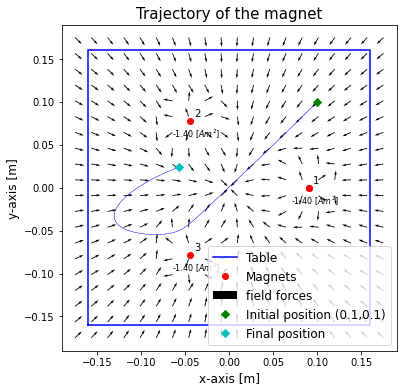

In [5]:
#Plot trajectories
%matplotlib inline
p.plot_alltable()              
p.plot_vector_space(res=20)
p.plot_path()

In [9]:
#Plot Energies evolution
%matplotlib auto
plot_.table_energy_evol(selfp)
plt.show()

Using matplotlib backend: TkAgg


In [12]:
# Plot trayectory 3D
%matplotlib auto
plot_.path3D(selfp)
plt.show()

### C. Lyapunov

In [5]:
# Modified parameters
T = 8                       # Total time of simulation
N = int(T/h)

p = pend.pendulum()
p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
p.set_code_parameters(h, N)
p.set_magnets(Mx, My, [0,0,0], mu, u)

Tiempo de ejecución: 4.79


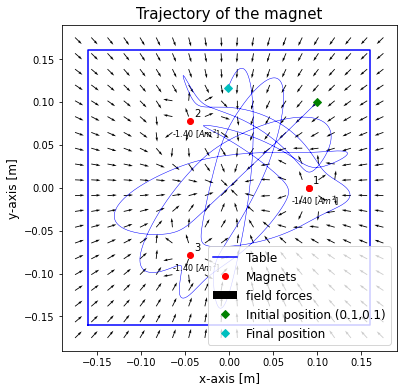

In [13]:
CI = [0.1, 0.1, 0, 0]
p.set_initial_conditions(CI, 'cartesians')
inicio = time.time(); p.find_path(show=False, Return='none')
fin = time.time(); print('Tiempo de ejecución: %.2f'%(fin-inicio))
p.plot_alltable(); p.plot_vector_space(res=20); p.plot_path()
selfp1 = p.get_self()

Tiempo de ejecución: 4.79


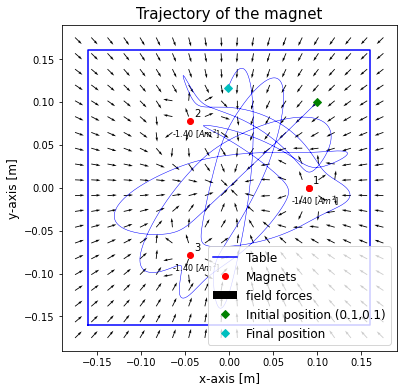

In [14]:
p2 = pend.pendulum()
p2.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
p2.set_code_parameters(h, N)
p2.set_magnets(Mx, My, [0,0,0], mu, u)
CI = [0.101, 0.099, 0, 0]
p2.set_initial_conditions(CI, 'cartesians')
inicio = time.time(); p2.find_path(show=False, Return='none')
fin = time.time(); print('Tiempo de ejecución: %.2f'%(fin-inicio))
p2.plot_alltable(); p2.plot_vector_space(res=20); p.plot_path()
selfp2 = p2.get_self()

In [7]:
def K(selfp):
    # Pendulum constants
    m = selfp.m
    d = selfp.d
    l = selfp.l
    # Positions
    X = selfp.X
    Y = selfp.Y
    Z = - np.sqrt(l**2 - X**2 - Y**2) + (l+d)
    # Velocities
    Vx = selfp.Vx
    Vy = selfp.Vy
    Vz = (X*Vx+Y*Vy)/(l+d-Z)
    # Kinetic Energy
    K = 0.5*m*(Vx**2+Vy**2+Vz**2)
    return K

def U0(selfp):
    m = selfp.m
    d = selfp.d
    l = selfp.l
    X0 = selfp.X[0]
    Y0 = selfp.Y[0]
    Z0 = - np.sqrt(l**2 - X0**2 - Y0**2) + (l+d)
    Ug = m*9.8*(Z0-d)
    return Ug

In [27]:
%matplotlib auto
plt.figure(figsize=(5,5))
K1 = K(selfp1)
K2 = K(selfp2) 
E = U0(selfp1)
NINTERVALS = len(K1)
h = selfp1.h
t = np.linspace(0, NINTERVALS*h, NINTERVALS)
plt.plot(t, (K1-K2)/E,'-r')
#plt.plot(t,K1,'--r')
#plt.plot(t,K2,'--b')
plt.show()

Using matplotlib backend: TkAgg


In [28]:
plt.plot(t, np.log((K1-K2)/E+1),'-b')

### C. Pruebas

In [11]:
selfp1.X[-1]

-0.0013855324781615662

In [12]:
selfp2.X[-1]

-0.02715282535374406